# Scrap My Prop

### Laboratórios de Engenharia Informática

**"Development of an IT solution for the extraction and automatic analysis of data and relevant information for the calculation of land and properties."**

## Importar Bibliotecas Python

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.debugger import set_trace
import geopy.distance
import os.path
from sklearn import metrics

# 'Imovirtual'

## Ler Dados do CSV

**Junção dos datasets através do 'id'**

In [3]:
k = True

for mes in range(4,6):
    if mes > 0 and mes < 10:
        mes = str(mes).zfill(2)
    print("------ Mês:", mes)
    for dia in range(1,31):
        if dia > 0 and dia < 10:
            dia = str(dia).zfill(2)
        print("--- Dia:", dia)
        if os.path.isfile(f'../dados/dados_imovirtual_{dia}_{mes}.csv'):
            if k:
                data_imo = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                print(data_imo.shape)
                k = False
            else:
                csv = pd.read_csv(f'../dados/dados_imovirtual_{dia}_{mes}.csv', engine='python', encoding='utf8')
                data_imo = data_imo.append(csv,sort=False)
                data_imo = data_imo.drop_duplicates(subset='Id', keep="last")
                data_imo.index = np.arange(1, len(data_imo) + 1)
                print(data_imo.shape)

------ Mês: 04
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
--- Dia: 10
--- Dia: 11
--- Dia: 12
--- Dia: 13
--- Dia: 14
--- Dia: 15
(5618, 132)
--- Dia: 16
(5684, 132)
--- Dia: 17
(5712, 132)
--- Dia: 18
(5740, 132)
--- Dia: 19
(5742, 132)
--- Dia: 20
(5755, 132)
--- Dia: 21
(5758, 132)
--- Dia: 22
(5796, 132)
--- Dia: 23
(5803, 132)
--- Dia: 24
(5827, 132)
--- Dia: 25
(5874, 132)
--- Dia: 26
(5877, 132)
--- Dia: 27
(5880, 132)
--- Dia: 28
--- Dia: 29
--- Dia: 30
------ Mês: 05
--- Dia: 01
--- Dia: 02
--- Dia: 03
--- Dia: 04
--- Dia: 05
--- Dia: 06
--- Dia: 07
--- Dia: 08
--- Dia: 09
(6160, 132)
--- Dia: 10
(6160, 132)
--- Dia: 11
(6162, 132)
--- Dia: 12
(6195, 132)
--- Dia: 13
(6222, 132)
--- Dia: 14
(6252, 132)
--- Dia: 15
(6289, 132)
--- Dia: 16
(6372, 132)
--- Dia: 17
(6373, 132)
--- Dia: 18
(6383, 132)
--- Dia: 19
(6437, 132)
--- Dia: 20
(6453, 132)
--- Dia: 21
--- Dia: 22
(6513, 132)
--- Dia: 23
(6532, 132)
--- Dia: 2

In [4]:
#data_imo = pd.read_csv('../dados/dados_imovirtual_08_05.csv', engine='python', encoding='utf8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
data_imo.head()

,Nome,Id,Tipo de imóvel,Preço,Preço m/2,Distrito,Concelho,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Vista de cidade.1,Área (m/2),Vista de mar,Jacuzzi,Património classificado,Adaptada a mobilidade reduzida,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Hidromassagem,Percurso de água,Armazém,Vista de Serra,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Sótão,Paisagem protegida
1,Loja comercial Junto ao Centro da Cidade de Br...,14804552.0,Loja,19 900,622,Braga (distrito),Braga,Sequeira,Rua Inácio José Peixoto,41.554660,-8.432971,NaN,NaN,32 m²,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Loja,1.0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Excelente Terreno em Fradelos, Braga",14976693.0,Terreno,97 000,60,Braga (distrito),Braga,Vilaça e Fradelos,NaN,41.507746,-8.477455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rústico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moradia Terrea em Lomar,15377577.0,Moradia,NaN,NaN,Braga (distrito),Braga,Lomar e Arcos,Rua Quinta das Mouras - Lomar,41.527420,-8.423300,T4,4 ou mais,537 m²,2 448 m²,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Moradia p/ Restauro - Maximinos,14698254.0,Moradia,149 500,1 495,Braga (distrito),Braga,"Braga (Maximinos, Sé e Cividade)",NaN,41.549550,-8.437720,T0,NaN,100 m²,131 m²,1980.0,NaN,NaN,NaN,NaN,Na

## Pré-processamento comum a todo o Dataset

**Funções auxiliares**

In [5]:
def toNumeric(string):
    res = str(string)
    res = res.replace(" ", "")
    res = res.replace(",", ".")
    res = float(pd.to_numeric(res, errors='ignore')) # tem que ser float porque esse tipo consegue interpretar o np.nan
    return res

**Colunas 'Distrito' e 'Concelho': Retirar colunas de forma total porque já era uma pré-condição do projeto, mas primeiro verificar se, de facto, todos os campos estão preenchidos com 'Braga';**

In [6]:
print("Distritos existentes:", data_imo['Distrito'].unique())
print("Concelhos existentes:", data_imo['Concelho'].unique())

Distritos existentes: ['Braga (distrito)' nan]
Concelhos existentes: ['Braga' nan]


In [7]:
if 'Distrito' in data_imo.columns:
    data_imo = data_imo.drop(['Distrito'], axis = 1) 
if 'Concelho' in data_imo.columns:
    data_imo = data_imo.drop(['Concelho'], axis = 1) 

**Coluna 'Nome': Não é característica dos imóveis mas sim identificador, portanto não deve entrar nos cálculos (Drop);**

In [8]:
if 'Nome' in data_imo.columns:
    data_imo = data_imo.drop(['Nome'], axis = 1) 

**Coluna 'Id': Drop linhas sem 'Id'; float -> int;**

In [9]:
data_imo = data_imo.dropna(subset=['Id'])
data_imo.index = np.arange(1, len(data_imo) + 1)

In [10]:
data_imo['Id'] = data_imo['Id'].astype(int)

**Dar join a colunas que, apesar de aparentarem ter nomes diferentes, representam o mesmo**

**Exemplo: Valores de 'Box 1 carro' e 'Box 2 carros' -> 'Garagem box'; Valores de 'Parqueamento (1 carro)' e 'Parqueamento (2 carros)' -> 'Estacionamento'; Valores de 'Hidromassagem' e 'Jacuzzi' -> 'Hidromassagem/jacuzzi'; ...**

**Fazer o mesmo com piscina e piscina privada???**

In [11]:
#pd.set_option('display.max_columns', None)
#data_imo.columns.to_numpy()

In [12]:
for index,val in data_imo['Vista de cidade.1'].items():
    if (val==True):
        data_imo['Vista de cidade'].iloc[index] = True
for index,val in data_imo['Sótão'].items():
    if (val==True):
        data_imo['Sotão'].iloc[index] = True
for index,val in data_imo['Vista de Serra'].items():
    if (val==True):
        data_imo['Vista de campo/serra'].iloc[index] = True
for index,val in data_imo['Adaptada a mobilidade reduzida'].items():
    if (val==True):
        data_imo['Adaptado a mobilidade reduzida'].iloc[index] = True
for index,val in data_imo['Box 1 carro'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Box 2 carros'].items():
    if (val==True):
        data_imo['Garagem box'].iloc[index] = True
for index,val in data_imo['Parqueamento (1 carro)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Parqueamento (2 carros)'].items():
    if (val==True):
        data_imo['Estacionamento'].iloc[index] = True
for index,val in data_imo['Hidromassagem'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
for index,val in data_imo['Jacuzzi'].items():
    if (val==True):
        data_imo['Hidromassagem/jacuzzi'].iloc[index] = True
        
data_imo=data_imo.drop(['Vista de cidade.1', 'Sótão', 'Vista de Serra', 'Hidromassagem', 'Jacuzzi', 'Adaptada a mobilidade reduzida'], axis=1)


C:\Users\Rui\Anaconda3\envs\LEI\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
#data_imo.info(verbose=True, null_counts=True)

**Normalizar os valores de todas as áreas; Transformar em dado numérico;**

In [14]:
for column in data_imo.columns:
    if "Área" in column and "Área administrativa" not in column and "Área florestal" not in column:
        for i in range(len(data_imo[column])):
            if not pd.isnull(data_imo[column].iloc[i]):
                #print(data_imo[column].iloc[i])
                data_imo[column].iloc[i]=toNumeric(str(data_imo[column].iloc[i])[0:-3])
                #print(data_imo[column].iloc[i])
                #print(type(data_imo[column].iloc[i]))

**Coluna 'Preço' e 'Preço m/2': Drop dos imóveis com valor 'nan'; Transformar em dado numérico;**

In [15]:
data_imo['Preço'] = data_imo['Preço'].apply(toNumeric)

nan_prices = data_imo['Preço'].index[data_imo['Preço'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço'] = data_imo['Preço'].apply(int)

# ------

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(toNumeric)

nan_prices = data_imo['Preço m/2'].index[data_imo['Preço m/2'].apply(np.isnan)]
data_imo = data_imo.drop(nan_prices)
data_imo.index = np.arange(1, len(data_imo) + 1)

data_imo['Preço m/2'] = data_imo['Preço m/2'].apply(int)

In [16]:
data_imo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 1 to 6567
Data columns (total 123 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   Id                                                    int32  
 1   Tipo de imóvel                                        object 
 2   Preço                                                 int64  
 3   Preço m/2                                             int64  
 4   Freguesia                                             object 
 5   Rua                                                   object 
 6   Latitude                                              float64
 7   Longitude                                             float64
 8   Tipologia                                             object 
 9   Nº Casas de Banho                                     object 
 10  Área útil m/2                                         object 
 11  Área bruta m/2  

# Dados - Prédios

**Ver os valores únicos de cada coluna para proceder ao processamento**

In [ ]:
for col in data_imo.columns:
    uniques=data_imo[col].unique()
    print("Valores únicos para a coluna ", col, ": ", uniques)

**Dividir os dados por tipo de imóvel**

In [18]:
data_imo_prédios = data_imo.loc[(data_imo['Tipo de imóvel'] == 'Prédio')]
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)

In [19]:
data_imo_prédios.head()

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
1,15353909,Prédio,2000000,563,Nogueiró e Tenões,NaN,41.545030,-8.399415,NaN,NaN,3552,3994,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14648644,Prédio,350000,745,"Braga (Maximinos, Sé e Cividade)",NaN,41.546000,-8.435960,NaN,NaN,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14683710,Prédio,330000,702,"Braga (Maximinos, Sé e Cividade)",NaN,41.551186,-8.431906,NaN,NaN,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Em construção,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14841256,Prédio,350000,3407,"Braga (Maximinos, Sé e Cividade)",NaN,41.551186,-8.431906,NaN,NaN,102.73,169.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15084895,Prédio,15

In [20]:
#data_imo_prédios.info(verbose=True, null_counts=True)

## Análise exploratória de dados

*Distribuição da feature 'Preço'*

Text(0.5, 0, 'Preço')

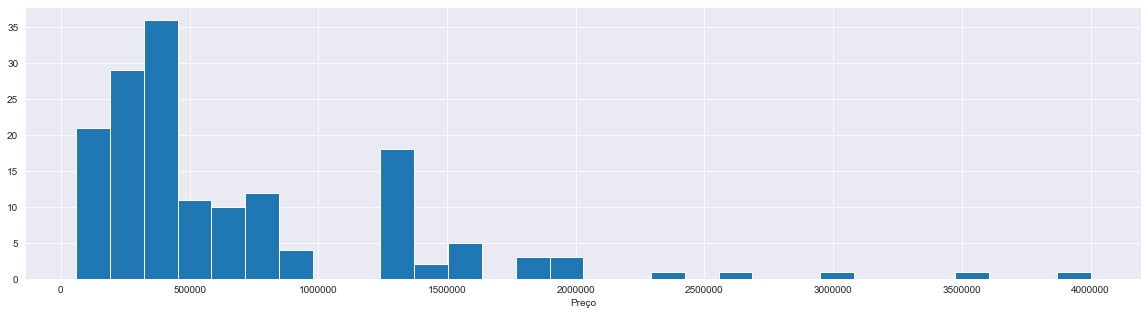

In [21]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_prédios['Preço'].hist(bins=30)
plt.xlabel('Preço')

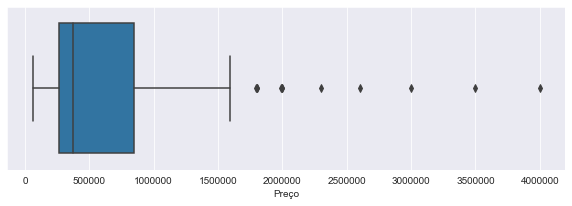

In [22]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_prédios['Preço'])

*Distribuição da feature 'Preço' - Outliers visuais*

In [24]:
a_excluir = data_imo_prédios[(data_imo_prédios['Preço'] >= 2000000)]
#a_excluir = data_imo_prédios[(data_imo_prédios['Preço'] >= 400000) | (data_imo_prédios['Preço'] <= 150000)]
data_imo_prédios = data_imo_prédios.drop(a_excluir.index)
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
a_excluir

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
1,15353909,Prédio,2000000,563,Nogueiró e Tenões,NaN,41.545030,-8.399415,NaN,NaN,3552,3994,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,14801239,Prédio,3000000,101,Nogueiró e Tenões,NaN,41.551395,-8.386406,NaN,NaN,29600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,15098262,Prédio,3500000,1167,Espinho,NaN,41.547830,-8.361280,NaN,NaN,3000,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,14973493,Prédio,2300000,1396,Braga (São José de São Lázaro e São João do So...,NaN,41.552452,-8.427119,NaN,NaN,1647,NaN,1937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,15408521,Prédio,2000000,563,Nogueiró e Ten

*Relação entre o Preço e outras variáveis*

Text(0, 0.5, 'Preço')

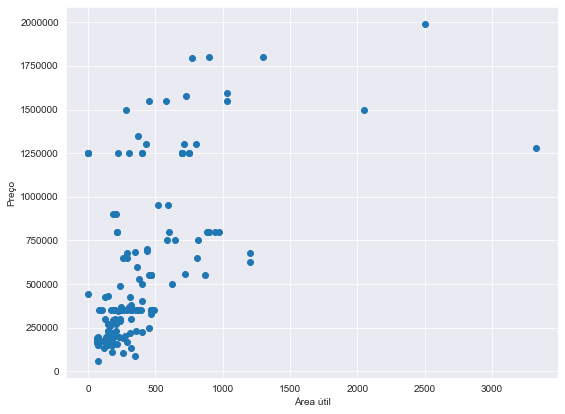

In [25]:
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data_imo_prédios['Área útil m/2'], data_imo_prédios['Preço'])
ax1.set_xlabel('Área útil')
ax1.set_ylabel('Preço')

*Relação entre o Preço e Área útil - Outliers visuais*

In [26]:
a_excluir = data_imo_prédios[(data_imo_prédios['Área útil m/2'] >= 1500)]
data_imo_prédios = data_imo_prédios.drop(a_excluir.index)
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
a_excluir

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Rua,Latitude,Longitude,Tipologia,Nº Casas de Banho,Área útil m/2,Área bruta m/2,Ano construção,Certificado energético,Armário,Cozinha equipada,Garagem box,Gás canalizado,Lareira,Marquise,Suite,Varanda,Vista de cidade,Condição,Despensa,Arrecadação,Porta blindada,Video Porteiro,Empreendimento,Ar condicionado,Elevador,Estores elétricos,Fibra ótica,Pré-instalação de ar condicionado,Terraço,Área de terreno m/2,Churrasco,Árvores de fruto,Sotão,Cave,Jardim,Aquecimento central,Caldeira,Acessibilidade a pessoas com mobilidade condicionada,Box 2 carros,Detetor de gás,Painéis solares,Recuperação de calor,Vista de campo/serra,Box 1 carro,Portaria,Estacionamento,Piso radiante,Som ambiente,Aspiração central,Finalidade,Tipo de terreno,Acesso pavimentado,Asfaltado,Iluminação pública,Zona arborizada,Declive,Ruína,Alarme,Furo de água,Domótica,Casa das máquinas,Condomínio Fechado,Parque infantil,Piscina,Piscina Privada,Termoacumulador,Garagem exterior,Mobilado,Hidromassagem/jacuzzi,Quintal/horta,Ginásio,Kitchenette,Vigilância/segurança,Campo de ténis,Segurança 24 horas,Vedação,Parqueamento (1 carro),Ligação a rede de água,Ligação a rede de saneamento,Ligação a rede elétrica,Animais permitidos,Parqueamento (2 carros),Cofre,Vista de rio,Nº divisões,Tipo,Pisos,Com WC,Montra,Anexo habitacional,Detetor de incêndio,Detetor de Inundução,Área (m/2),Vista de mar,Património classificado,Com cozinha,Imóvel de banca,Vista de lago,Fossa séptica,Licensa de construção,Acesso a veículos pesados,Área administrativa,Copa,Recepção,Refeitório,Sala de reuniões,Área florestal,Percurso de água,Armazém,Adaptado a mobilidade reduzida,Terra batida,Video vigilância,Espaço frigorífico,Espaço para arrumação,Casa de banho partilhada,Poço,Paisagem protegida
45,15182238,Prédio,1280000,385,Ferreiros e Gondizalves,Travessa de Dom José,41.543258,-8.459746,NaN,NaN,3327,3327,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,9653752,Prédio,1500000,732,"Braga (Maximinos, Sé e Cividade)",NaN,41.542927,-8.437615,NaN,NaN,2048,NaN,1890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,13710535,Prédio,1990000,796,Braga (São José de São Lázaro e São João do So...,NaN,41.543250,-8.428610,NaN,NaN,2500,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Para recuperar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Relacionamento do 'Preço' com outras features categóricas importantes*

In [27]:
cat_data = data_imo_prédios[['Freguesia']]

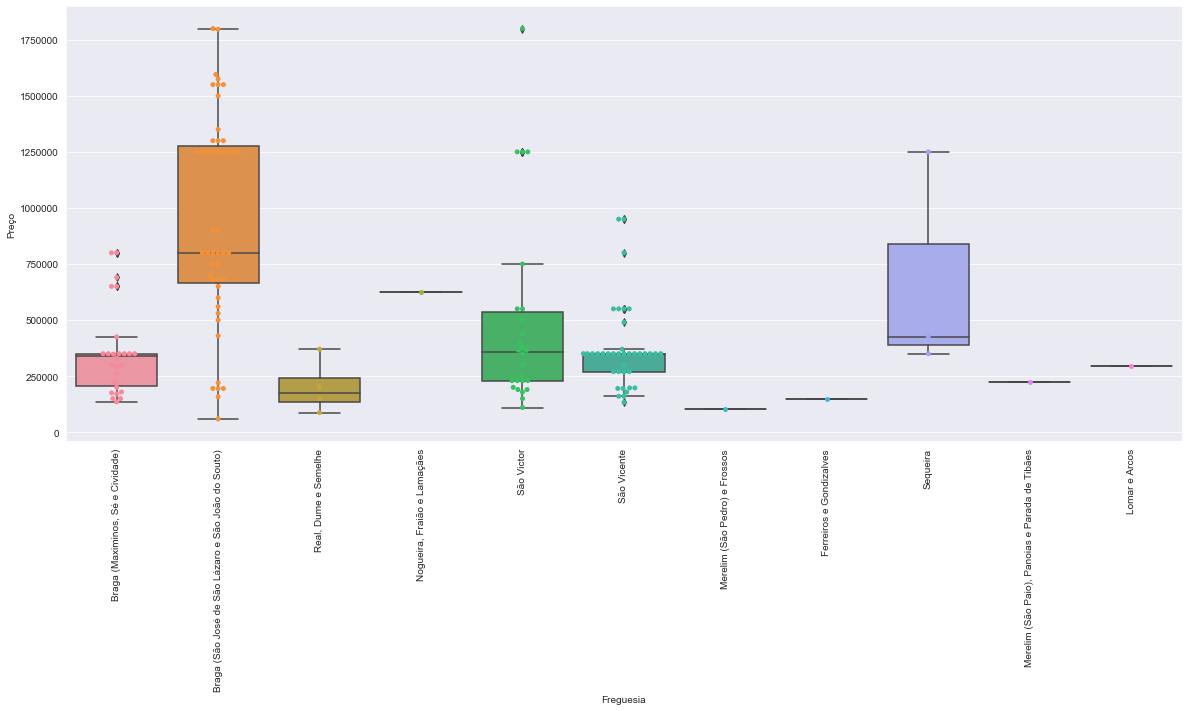

In [28]:
for cat in cat_data.dtypes[:10].index.values:
    plt.figure(figsize=(20, 8))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='Preço', data=data_imo_prédios) 
    sns.swarmplot(x=cat, y='Preço', data=data_imo_prédios)
    plt.show()

**Dados em falta por coluna**

In [29]:
pd.set_option('display.max_rows', None)
percent_missing = data_imo_prédios.isnull().sum() * 100 / len(data_imo_prédios)
missing_value_data_imo_prédios_columns = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_prédios_columns.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
Declive,100.000000
Zona arborizada,100.000000
Nº divisões,100.000000
Vista de rio,100.000000
Cofre,100.000000
Parqueamento (2 carros),100.000000
Animais permitidos,100.000000
Ligação a rede elétrica,100.000000
Ligação a rede de saneamento,100.000000
Ligação a rede de água,100.000000


In [30]:
pd.set_option('display.max_rows', 10)

**Remover colunas que tenham mais de 30% (?) de missing values**

In [31]:
a_manter = list(missing_value_data_imo_prédios_columns.index[missing_value_data_imo_prédios_columns['percent_missing (%)'] < 30])
data_imo_prédios = data_imo_prédios[a_manter]
data_imo_prédios

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Latitude,Longitude,Área útil m/2,Condição
1,14648644,Prédio,350000,745,"Braga (Maximinos, Sé e Cividade)",41.546000,-8.435960,470,NaN
2,14683710,Prédio,330000,702,"Braga (Maximinos, Sé e Cividade)",41.551186,-8.431906,470,Em construção
3,14841256,Prédio,350000,3407,"Braga (Maximinos, Sé e Cividade)",41.551186,-8.431906,102.73,NaN
4,15084895,Prédio,1550000,3429,Braga (São José de São Lázaro e São João do So...,41.550454,-8.420644,452,Para recuperar
5,15375551,Prédio,87500,250,"Real, Dume e Semelhe",41.558441,-8.447287,350,Ruína
...,...,...,...,...,...,...,...,...,...
145,14579713,Prédio,195000,2786,São Vicente,41.562110,-8.438460,70,Para recuperar
146,11462854,Prédio,299000,949,São Victor,41.557730,-8.406450,315,NaN
147,9989383,Prédio,800000,825,São Vicente,41.562110,-8.438460,970,Usado
148,9943450,Prédio,440000,366667,São Victor,41.555270,-8.404720,1.2,NaN


**Dados em falta por linha**

In [32]:
percent_missing = (1 - data_imo_prédios.apply(lambda x: x.count(), axis=1) / len(data_imo_prédios.columns)) * 100
missing_value_data_imo_prédios_rows = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_imo_prédios_rows.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
1,11.111111
133,11.111111
25,11.111111
33,11.111111
34,11.111111
...,...
46,0.000000
45,0.000000
44,0.000000
43,0.000000


**Remover linhas com percentagem de dados em falta superior a 50%**

In [33]:
a_excluir = missing_value_data_imo_prédios_rows[(missing_value_data_imo_prédios_rows['percent_missing (%)'] >= 50)]
data_imo_prédios = data_imo_prédios.drop(a_excluir.index)
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)

**Inserir dados em falta**

In [34]:
for x in data_imo_prédios.select_dtypes(include=['float64']).columns.tolist():
    median_value=data_imo_prédios[x].median()
    data_imo_prédios[x]=data_imo_prédios[x].fillna(median_value)

for y in data_imo_prédios.select_dtypes(include=['object']).columns.tolist():
    mode_value=data_imo_prédios[y].mode()
    data_imo_prédios[y]=data_imo_prédios[y].fillna(mode_value[0])    
    
data_imo_prédios

,Id,Tipo de imóvel,Preço,Preço m/2,Freguesia,Latitude,Longitude,Área útil m/2,Condição
1,14648644,Prédio,350000,745,"Braga (Maximinos, Sé e Cividade)",41.546000,-8.435960,470.00,Usado
2,14683710,Prédio,330000,702,"Braga (Maximinos, Sé e Cividade)",41.551186,-8.431906,470.00,Em construção
3,14841256,Prédio,350000,3407,"Braga (Maximinos, Sé e Cividade)",41.551186,-8.431906,102.73,Usado
4,15084895,Prédio,1550000,3429,Braga (São José de São Lázaro e São João do So...,41.550454,-8.420644,452.00,Para recuperar
5,15375551,Prédio,87500,250,"Real, Dume e Semelhe",41.558441,-8.447287,350.00,Ruína
...,...,...,...,...,...,...,...,...,...
145,14579713,Prédio,195000,2786,São Vicente,41.562110,-8.438460,70.00,Para recuperar
146,11462854,Prédio,299000,949,São Victor,41.557730,-8.406450,315.00,Usado
147,9989383,Prédio,800000,825,São Vicente,41.562110,-8.438460,970.00,Usado
148,9943450,Prédio,440000,366667,São Victor,41.555270,-8.404720,1.20,Usado


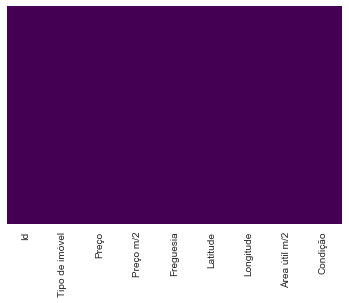

In [35]:
sns.heatmap(data_imo_prédios.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Estruturação dos Dados

## Inserção de dados acerca da localização do imóvel

*www.google.com/maps/*

**Funções auxiliares**

In [36]:
def distance_coordinates(lat1,lon1,lat2,lon2):
    
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    
    res = geopy.distance.geodesic(coords_1, coords_2).km

    return round(res,3)

def minDist(data_imo, values):
    distancias = []
    for index, row in data_imo.iterrows():
        min_dist = 99999999.9
        for value in values.values():
            dist = distance_coordinates(data_imo_prédios.iloc[index-1]['Latitude'],data_imo_prédios.iloc[index-1]['Longitude'],value[0],value[1])
            if dist < min_dist:
                min_dist = dist    
        distancias.append(min_dist)
    return distancias

**Centro da Cidade**

In [37]:
centro_cidade = {}
centro_cidade['Centro'] = 41.5514083,-8.4230248

In [38]:
data_imo_prédios['Centro Cidade (km)'] = minDist(data_imo_prédios, centro_cidade)

**Hospitais**

In [39]:
hospitais = {}
hospitais['Hospital de Braga'] = 41.5679738,-8.3990116
hospitais['Trofa Saúde - Braga Sul'] = 41.5246625,-8.4141593
hospitais['Trofa Saúde - Braga Centro'] = 41.5498965,-8.4187538
hospitais['Lusíadas Braga'] = 41.5476764,-8.4224197

In [40]:
data_imo_prédios['Hospitais (km)'] = minDist(data_imo_prédios, hospitais)

**Centros de Saúde**

In [41]:
centros_saude = {}
centros_saude['Braga Centro'] = 41.5471857,-8.4279198
centros_saude['Infias'] = 41.5602432,-8.4228005
centros_saude['USF do Minho'] = 41.5465815,-8.4147386
centros_saude['Clinica de Sao Marcos'] = 41.5454486,-8.426507
centros_saude['O Poverello'] = 41.5703584,-8.4114745
centros_saude['Clinica Cubana Braga'] = 41.5492599,-8.4262347
centros_saude['Clinica Médico - Cirurgica De Santa Tecla'] = 41.5489178,-8.4117642
centros_saude['Hemoatlantico - Braga'] = 41.5459355,-8.4314237
centros_saude['Centro de Vacinação Internacional'] = 41.5586578,-8.3999608
centros_saude['Clinica Enguardas'] = 41.5571581,-8.4127898
centros_saude['USF Braga Norte'] = 41.5603489,-8.4227264
centros_saude['USF Carandá'] = 41.5525337,-8.4123
centros_saude['USF Bracara Augusta'] = 41.5422297,-8.4105532
centros_saude['USF Maxisaúde'] = 41.5473324,-8.4279983
centros_saude['USF São Lourenço'] = 41.5142651,-8.4559502
centros_saude['USF São João de Braga'] = 41.5463782,-8.4145564
centros_saude['USF Manuel Rocha Peixoto'] = 41.5473003,-8.4279339
centros_saude['USF Gualtar'] = 41.5682764,-8.3871645
centros_saude['USF Saúde Oeste'] = 41.5325817,-8.4733681
centros_saude['USF Tadim'] = 41.5079792,-8.4879975
centros_saude['Gualtar'] = 41.5683003,-8.3872187
centros_saude['USF Esporões'] = 41.5120606,-8.4201814
centros_saude['USF Salutis'] = 41.5465247,-8.4147014
centros_saude['USP de Braga'] = 41.5588888,-8.3998833

In [42]:
data_imo_prédios['Centros Saúde (km)'] = minDist(data_imo_prédios, centros_saude)

**Centros Comerciais**

In [43]:
centroscomerciais = {}
centroscomerciais['Braga Parque'] = 41.5577669,-8.4060603
centroscomerciais['Minho Center'] = 41.540935,-8.400464
centroscomerciais['Nova Arcada'] = 41.579068,-8.429654

In [44]:
data_imo_prédios['Centro Comerciais (km)'] = minDist(data_imo_prédios, centroscomerciais)

**Escolas**

In [45]:
escolas = {}
escolas['Secundária Sá de Miranda'] = 41.5568137,-8.4182525
escolas['Básica Francisco Sanches'] = 41.5548131,-8.4118978
escolas['Básica de Gualtar'] = 41.5669867,-8.38796
escolas['Básica de Lamaçães'] = 41.5471216,-8.4016327
escolas['Secundária Carlos Amarante'] = 41.5509961,-8.413909
escolas['Básica de Palmeira'] = 41.5771831,-8.4245399
escolas['Secundária de Maximinos'] = 41.5424538,-8.4415713
escolas['Básica André Soares'] = 41.5470115,-8.415924
escolas['Básica do 1º Ciclo de São Vitor'] = 41.55186,-8.4129202
escolas['Básica de Real'] = 41.5577824,-8.4395854
escolas['Jardim Escola João de Deus'] = 41.5447436,-8.407904
escolas['Colégio Luso Internacional de Braga'] = 41.56979,-8.3885487
escolas['EB1 Quinta da Veiga'] = 41.5590263,-8.4239226
escolas['Secundária D. Maria II'] = 41.5487484,-8.4177364
escolas['Básica Bairro da Misericórdia'] = 41.5578043,-8.4262862
escolas['EB1 Carandá'] = 41.5452545,-8.4156397
escolas['Colégio Dom Diogo de Sousa'] = 41.5575,-8.415931
escolas['Centro Escolar Ponte Pedrinha'] = 41.5403601,-8.4294783
escolas['EB1/J1 Bairro da Alegria'] = 41.5638599,-8.402921

In [46]:
data_imo_prédios['Escolas (km)'] = minDist(data_imo_prédios, escolas)

**Universidades**

In [47]:
universidades = {}
universidades['Universidade do Minho - Campus de Gualtar'] = 41.5607319,-8.3962368
universidades['IPCA - Pólo de Braga'] = 41.5421121,-8.4210972
universidades['Universidade Católica Portuguesa'] = 41.554852,-8.4209143

In [48]:
data_imo_prédios['Universidades (km)'] = minDist(data_imo_prédios, universidades)

**Estação de Comboios**

In [49]:
estacao = {}
estacao['Estacao'] = 41.548143,-8.4344431

In [50]:
data_imo_prédios['Estação de Comboios (km)'] = minDist(data_imo_prédios, estacao)

**Parques Industriais**

*www.igogo.pt/parques-industriais-braga/*

In [51]:
parques_industriais = {}
parques_industriais['Frossos'] = 41.5595545,-8.447319
parques_industriais['Quinta do Carreiro'] = 41.5653531,-8.4454561
parques_industriais['Adaúfe'] = 41.5974779,-8.4135554
parques_industriais['Celeirós'] = 41.5109663,-8.454419
parques_industriais['Marvilha'] = 41.5318363,-8.4735374
parques_industriais['Mire de Tibães'] = 41.5819656,-8.4767172
parques_industriais['Padim da Graça'] = 41.5692605,-8.4890601
parques_industriais['Pitancinhos'] = 41.5840245,-8.4219733
parques_industriais['Vilça'] = 41.5154222,-8.4937553

In [52]:
data_imo_prédios['Parques Industriais (km)'] = minDist(data_imo_prédios, parques_industriais)

**Central de Autocarros**

In [53]:
central_autocarros = {}
central_autocarros['Central'] = 41.555324,-8.425410

In [54]:
data_imo_prédios['Central Autocarros (km)'] = minDist(data_imo_prédios, central_autocarros)

**Bancos**

In [55]:
bancos = {}
bancos['BPI Frossos'] = 41.561298,-8.447379
bancos['BPI Gualtar'] = 41.5647823,-8.3876109
bancos['Crédito Agrícola Braga'] = 41.5514726,-8.4278259
bancos['Activo Bank'] = 41.5521836,-8.4267081
bancos['Banif Centro'] = 41.5524396,-8.4236611
bancos['Banco de Portugal'] = 41.5518264,-8.4234077
bancos['Montepio Centro'] = 41.5517009,-8.4180607
bancos['Montepio Centro 2'] = 41.5507289,-8.4250391
bancos['Novo Banco Centro'] = 41.5507776,-8.4238804
bancos['Banco de Investimento Global'] = 41.5495727,-8.4251216
bancos['Novo Banco Centro 2'] = 41.5492902,-8.4121129
bancos['Banco Millenium BCP São Lázaro'] = 41.5475307,-8.4210104
bancos['BBVA São Lázaro'] = 41.5464477,-8.4199778
bancos['Santander Totta Lamaçães'] = 41.5479773,-8.4033012
bancos['Caixa Geral de Depósito Lamaçães'] = 41.5480627,-8.4035902
bancos['BPI Dume'] = 41.5450355,-8.4019862
bancos['Novo Banco Maximinos'] = 41.5448869,-8.4337664
bancos['Caixa Geral de Depósitos Maximinos'] = 41.547196,-8.4338421
bancos['BPI N14'] = 41.53774,-8.434457

In [56]:
data_imo_prédios['Bancos (km)'] = minDist(data_imo_prédios, bancos)

**Correios**

In [57]:
correios = {}
correios['CTT Maximinos'] = 41.5444322,-8.4340695
correios['CTT São Lázaro'] = 41.544917,-8.420586
correios['CTT Fonte Seca'] = 41.535935,-8.4016483
correios['CTT 25 de Abril'] = 41.5474966,-8.4204056
correios['Estação de Correios de Santa Tecla'] = 41.5484275,-8.4118152
correios['CTT Nogueira, Fraiões e Lamaçães'] = 41.5480095,-8.4040274
correios['Posto de Correios de Braga (São José de Lázaro)'] = 41.5497985,-8.4193059
correios['CTT Largo de São Francisco'] = 41.5518429,-8.423987
correios['CTT Braga Parque'] = 41.556725,-8.4056481
correios['CTT Largo de Infias'] = 41.5579778,-8.4165392

In [58]:
data_imo_prédios['Correios (km)'] = minDist(data_imo_prédios, correios)

**Parques e zonas verdes**

In [59]:
parques_lazer = {}
parques_lazer['Parque de Lazer de Gerizes'] = 41.5835983,-8.449529
parques_lazer['Parque da Rodovia'] = 41.552828,-8.4031463
parques_lazer['Jardim da Avenida Central'] = 41.551519,-8.421523
parques_lazer['Parque São João da Ponte'] = 41.5454706,-8.4265083
parques_lazer['Parque da Ponte'] = 41.541304, -8.419441
parques_lazer['Parque de Lazer da Rampa da Falperra'] = 41.5309717,-8.3944834
parques_lazer['Parque de Lazer do Ribeiro dos Prados'] = 41.5052344,-8.4422877 

In [60]:
data_imo_prédios['Parques e Zonas Verdes (km)'] = minDist(data_imo_prédios, parques_lazer)

**Serviços Públicos**

*https://eportugal.gov.pt/locais-de-atendimento-de-servicos-publicos/-/pesquisa/search_stores*

In [61]:
servicos_publicos = {}
servicos_publicos['Finanças 1'] = 41.5498747,-8.4194008
servicos_publicos['Finanças 2'] = 41.5440114,-8.4358346
servicos_publicos['Segurança Social'] = 41.5477731,-8.4129363
servicos_publicos['Serviços de RSI'] = 41.5424794,-8.4360436
servicos_publicos['Gabinete de Atendimento ao Cidadão'] = 41.5561192,-8.4121799
servicos_publicos['Conservatória do Registo Civil'] = 41.5518773,-8.4222603
servicos_publicos['IEFP - Centro de Emprego'] = 41.5423426,-8.4339527
servicos_publicos['SEF - Loja do Cidadão de Braga'] = 41.5474961,-8.421969
servicos_publicos['Espaço Cidadão Sobreposta'] = 41.547783,-8.3619992
servicos_publicos['Espaço Cidadão Adaúfe'] = 41.5861605,-8.3926854
servicos_publicos['Espaço Cidadão Figueiredo'] = 41.5048946,-8.4349509
servicos_publicos['Espaço Cidadão Real'] = 41.5575145,-8.4440584
servicos_publicos['Espaço Cidadão S. Vicente'] = 41.5565553,-8.4241112
servicos_publicos['Espaço Cidadão Sequeira'] = 41.5323623,-8.4732977
servicos_publicos['Espaço Cidadão Tadim'] = 41.5057871,-8.4916939

In [62]:
data_imo_prédios['Serviços Públicos (km)'] = minDist(data_imo_prédios, servicos_publicos)

**Policia Municipal**

In [63]:
policia = {}
policia['Policia'] = 41.5495054,-8.4267993

In [64]:
data_imo_prédios['Policia Municipal (km)'] = minDist(data_imo_prédios, policia)

**Farmácias**

*https://portalnacional.com.pt/braga/braga/farmacias/*

In [65]:
farmacias = {}
farmacias['Adaúfe'] = 41.5858796,-8.4020402
farmacias['Alvim - Merelim (São Pedro) e Frossos'] = 41.5595977,8.4479227
farmacias['Araújo Rodrigues - Celeirós'] = 41.5129219,-8.4503908
farmacias['Beatriz - São Vitor'] = 41.5492671,-8.4133199
farmacias['Braga - São Vitor'] = 41.5511534,-8.4064856
farmacias['Brito - São José de São Lázaro e São João do Souto'] = 41.5505688,-8.4228146
farmacias['Carmo - Merelim (São Pedro) e Frossos'] = 41.5716977,-8.45249
farmacias['Central - São José de São Lázaro e São João do Souto'] = 41.551847,-8.4250035
farmacias['Coelho - Maximinos, Sé e Cividade'] = 41.5514527,-8.4280069
farmacias['Cristal - São José de São Lázaro'] = 41.5486228,-8.4216631
farmacias['Santa Casa da Misericórdia - São José de São Lázaro e São João do Souto'] = 41.5490779,-8.4232058
farmacias['Esporões'] = 41.5119635,-8.4203129
farmacias['Gualtar'] = 41.565306,-8.3872187
farmacias['Lamaçães'] = 41.547976,-8.4012761
farmacias['Lomar'] = 41.5307238,-8.427394
farmacias['Henriquina - São Vitor'] = 41.5524657,-8.4139864
farmacias['Lima - São José de São Lázaro e São João do Souto'] = 41.5536114,-8.4235402
farmacias['Loureiro Basto - Palmeira'] = 41.5905331,-8.4295469
farmacias['Marques - São José de São Lázaro e São João do Souto'] = 41.550423,-8.423677
farmacias['Martins - São José de São Lázaro e São João do Souto'] = 41.5510726,-8.4223516
farmacias['Narcisa C. Dias - Veiga do Penso, Escudeiros e Penso'] = 41.4868491,-8.4292978
farmacias['Nova de Nogueira - Nogueira'] = 41.5304337,-8.4102638
farmacias['Nuno Barros - Real'] = 41.554171,-8.438716
farmacias['Oliveira - Ferreiros'] = 41.5345909,-8.4400511
farmacias['Osório - Ruães'] = 41.5808657,-8.4758667
farmacias['Pimenta - Cabreiros'] = 41.5334211,-8.4965154
farmacias['Farmácia Pimentel - Sao Vitor'] = 41.557452,-8.408761
farmacias['Farmácia Pinheiro - Maximinos, Sé e Cividadee'] = 41.5456516,-8.4334375
farmacias['Farmácia Pipa - Nogueira, Fraião e Lamaçães'] = 41.5435379,-8.3995875
farmacias['Farmácia Rodrigues - Maximinos, Sé e Cividade'] = 41.5503813,-8.4287748
farmacias['Farmácia Roma - São José de São Lázaro e São João do Souto'] = 41.5532189,-8.4237785
farmacias['Farmácia Santos - São Vicente'] = 41.5566642,-8.4197066
farmacias['Farmácia Santos da Cunha - Maximinos, Sé e Cividade'] = 41.5417512,-8.4298574
farmacias['Farmácia São João - São José de São Lázaro e São João do Souto'] = 41.5450471,-8.4196004
farmacias['Farmácia Silva - São Vítor'] = 41.551804,-8.4174405
farmacias['Farmácia Sousa Gomes - Maximinos, Sé e Cividade'] = 41.5512345,-8.4288927
farmacias['Farmácia Tebosa - Laião-Tebosa'] = 41.4863814,-8.4758655
farmacias['Farmácia Vidal - Tadim'] = 41.5078378,-8.4869193

In [66]:
data_imo_prédios['Farmácias (km)'] = minDist(data_imo_prédios, farmacias)

**Outliers (Localização do imóvel errada)**

In [67]:
a_excluir = data_imo_prédios[(data_imo_prédios['Centro Cidade (km)'] >= 30)]
data_imo_prédios = data_imo_prédios.drop(a_excluir.index)
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
#a_excluir

**Retirar identificadores**

In [69]:
data_imo_prédios = data_imo_prédios.drop(columns=['Preço m/2','Tipo de imóvel','Longitude','Latitude'])

### Outliers Visuais

In [70]:
data_imo_prédios["Área útil m/2"] = data_imo_prédios["Área útil m/2"].astype(float)

*Preço*

Text(0.5, 0, 'Preço')

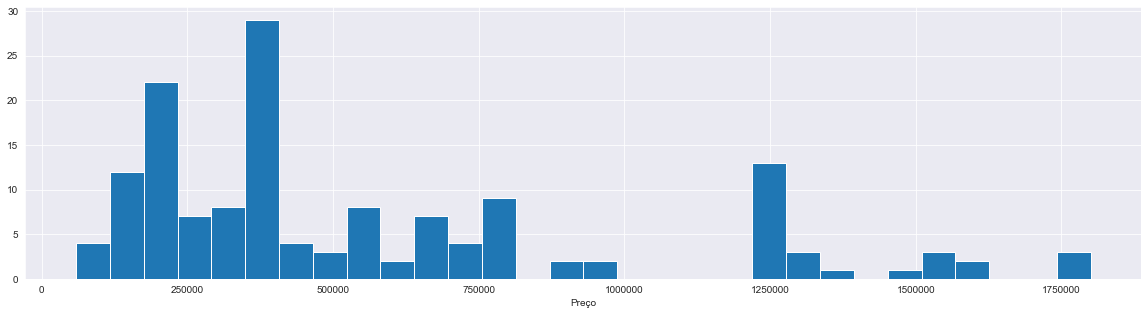

In [71]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
data_imo_prédios['Preço'].hist(bins=30)
plt.xlabel('Preço')

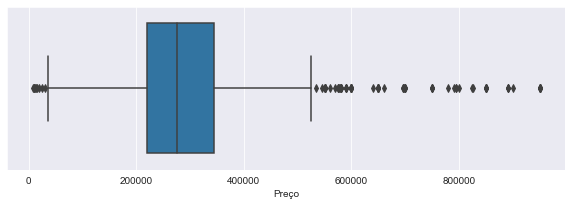

In [355]:
fig = plt.figure(figsize = (10,3))
sns.boxplot(x=data_imo_prédios['Preço'])

In [72]:
a_excluir = data_imo_prédios[(data_imo_prédios['Preço'] >= 600000)]
data_imo_prédios = data_imo_prédios.drop(a_excluir.index)
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
a_excluir.shape

(51, 20)

*Área útil*

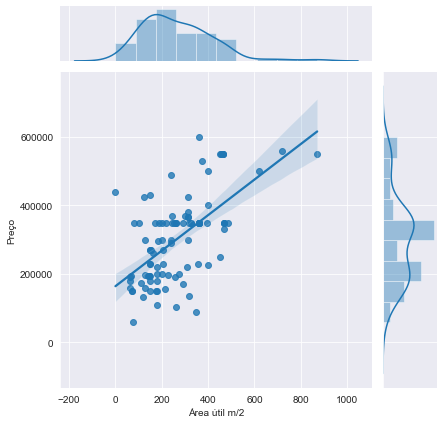

In [73]:
sns.jointplot(data_imo_prédios['Área útil m/2'], data_imo_prédios['Preço'], kind='reg')

*Freguesia*

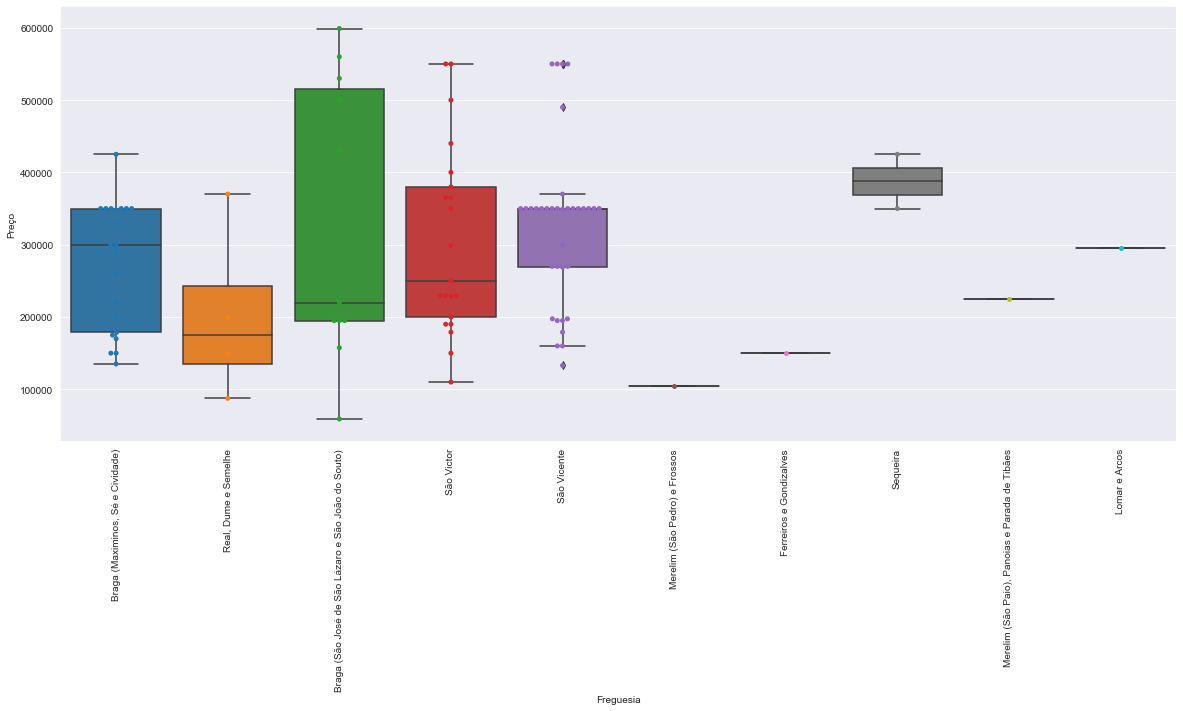

In [74]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.boxplot(data_imo_prédios['Freguesia'], data_imo_prédios['Preço'])
sns.swarmplot(data_imo_prédios['Freguesia'], data_imo_prédios['Preço'])
plt.show()

### Encoding Str -> Int

In [75]:
data_imo_prédios_mlp = data_imo_prédios.copy()
data_imo_prédios = data_imo_prédios.drop(columns=['Id'])

In [76]:
#freguesia = pd.get_dummies(data_imo_prédios['Freguesia'])
#tipologia = pd.get_dummies(data_imo_prédios['Tipologia'])
#condicao = pd.get_dummies(data_imo_prédios['Condição'])

#data_imo_prédios.drop(['Freguesia','Tipologia','Condição'],axis=1,inplace=True)
#data_imo_prédios = pd.concat([data_imo_prédios,freguesia,tipologia,condicao],axis=1)
#data_imo_prédios

from sklearn.preprocessing import LabelEncoder
cat_features = data_imo_prédios.dtypes[data_imo_prédios.dtypes == "object"].index 
for c in cat_features.to_list():
    lbl = LabelEncoder() 
    lbl.fit(list(data_imo_prédios[c].values)) 
    data_imo_prédios[c] = lbl.transform(list(data_imo_prédios[c].values))

### Outliers Z-Score

In [77]:
z = np.abs(stats.zscore(data_imo_prédios))
threshold = 3
print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers

(array([13, 57, 57, 57, 81, 81, 94], dtype=int64), array([ 2,  5,  6, 16, 15, 18,  2], dtype=int64))


In [78]:
# Só fazer 1 vez
data_imo_prédios = data_imo_prédios[(np.abs(stats.zscore(data_imo_prédios)) < 3).all(axis=1)]
data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
data_imo_prédios

#data_imo_prédios = data_imo_prédios[(np.abs(stats.zscore(data_imo_prédios['Preço'])) < 1)]
#data_imo_prédios.index = np.arange(1, len(data_imo_prédios) + 1)
#data_imo_prédios

,Preço,Freguesia,Área útil m/2,Condição,Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,350000,0,470.00,5,1.235,1.145,0.379,2.816,0.612,1.313,0.270,1.779,1.359,0.221,0.235,0.791,0.221,0.858,0.214
2,330000,0,470.00,0,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
3,350000,0,102.73,5,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
4,87500,6,350.00,4,2.170,2.394,1.918,2.722,0.647,2.236,1.567,0.124,1.858,0.317,1.907,2.254,0.288,1.976,0.858
5,350000,0,170.00,2,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,195000,1,145.00,5,0.967,0.567,0.517,1.576,0.367,0.207,1.392,2.972,1.444,0.366,0.226,0.214,0.532,0.949,0.207
91,550000,9,465.00,2,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
92,195000,8,70.00,2,1.752,2.088,1.323,2.022,0.490,1.671,1.587,0.686,1.324,0.749,1.661,1.838,0.692,1.705,0.882
93,299000,9,315.00,5,1.551,1.296,0.533,0.033,0.558,0.915,2.567,3.195,1.604,1.050,0.130,0.610,0.510,1.928,0.195


**Análise exploratória dos dados sem outliers**

----

## Skewness

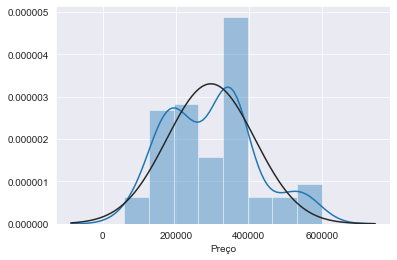

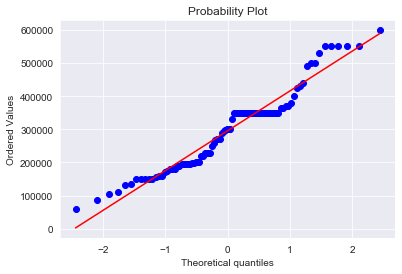

In [79]:
sns.distplot(data_imo_prédios['Preço'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_imo_prédios['Preço'], plot=plt)

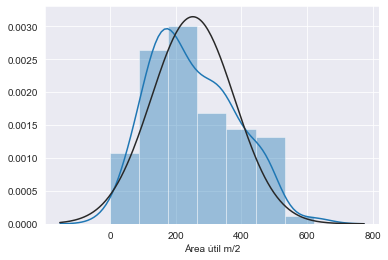

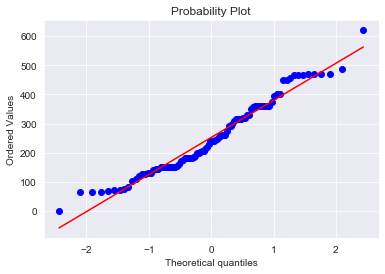

In [80]:
sns.distplot(data_imo_prédios['Área útil m/2'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_imo_prédios['Área útil m/2'], plot=plt)

## Dataset estruturado

In [81]:
data_imo_prédios

,Preço,Freguesia,Área útil m/2,Condição,Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,350000,0,470.00,5,1.235,1.145,0.379,2.816,0.612,1.313,0.270,1.779,1.359,0.221,0.235,0.791,0.221,0.858,0.214
2,330000,0,470.00,0,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
3,350000,0,102.73,5,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
4,87500,6,350.00,4,2.170,2.394,1.918,2.722,0.647,2.236,1.567,0.124,1.858,0.317,1.907,2.254,0.288,1.976,0.858
5,350000,0,170.00,2,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,195000,1,145.00,5,0.967,0.567,0.517,1.576,0.367,0.207,1.392,2.972,1.444,0.366,0.226,0.214,0.532,0.949,0.207
91,550000,9,465.00,2,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
92,195000,8,70.00,2,1.752,2.088,1.323,2.022,0.490,1.671,1.587,0.686,1.324,0.749,1.661,1.838,0.692,1.705,0.882
93,299000,9,315.00,5,1.551,1.296,0.533,0.033,0.558,0.915,2.567,3.195,1.604,1.050,0.130,0.610,0.510,1.928,0.195


## Modelos de regressão


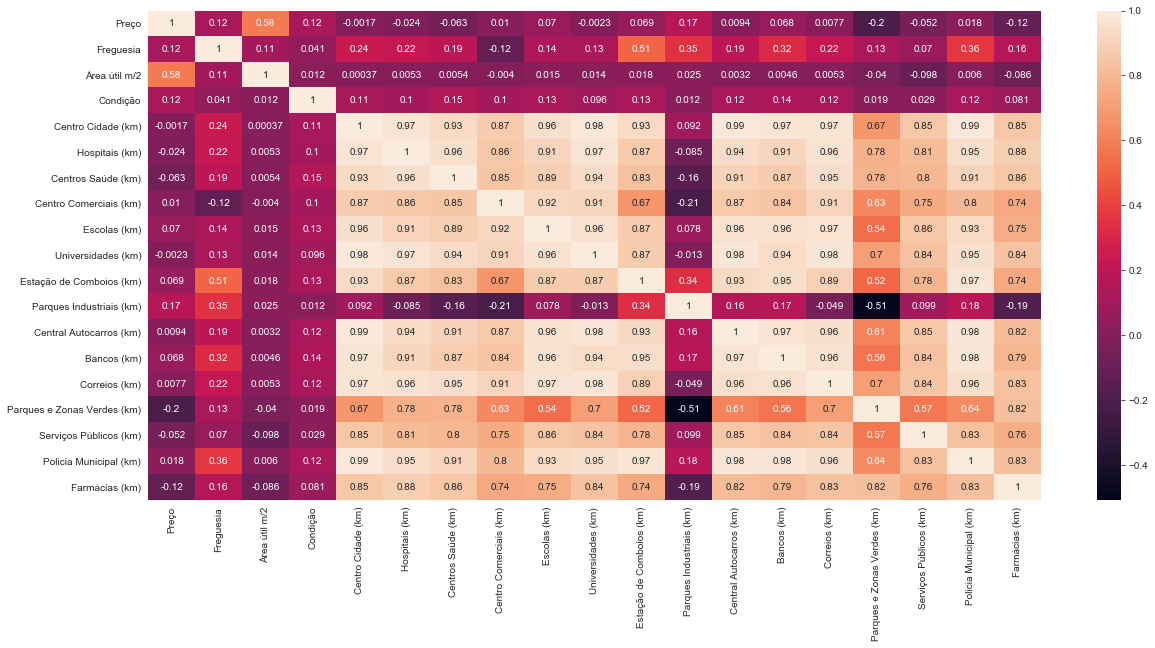

In [82]:
corr = data_imo_prédios.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

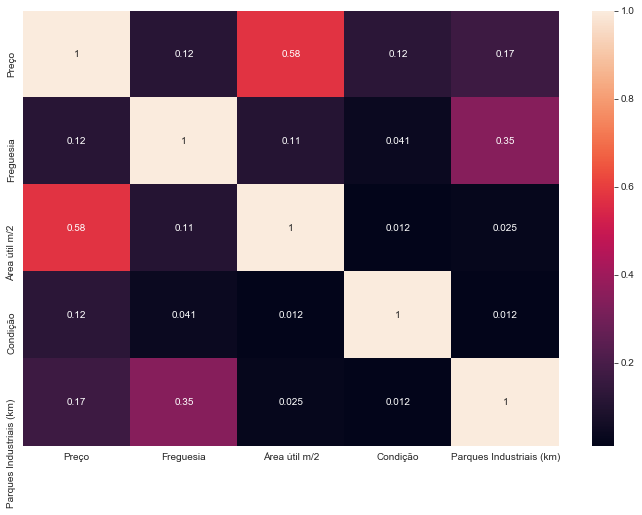

In [83]:
top_feature = corr.index[abs(corr['Preço']>0.1)]
plt.subplots(figsize=(12, 8))
top_corr = data_imo_prédios[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

**Features mais importantes relativamente ao target**

In [84]:
corr = data_imo_prédios.corr()
corr.sort_values(['Preço'], ascending=False, inplace=True)
corr.Preço

Preço                          1.000000
Área útil m/2                  0.578029
Parques Industriais (km)       0.171546
Condição                       0.124628
Freguesia                      0.118981
                                 ...   
Hospitais (km)                -0.023926
Serviços Públicos (km)        -0.052145
Centros Saúde (km)            -0.062993
Farmácias (km)                -0.116074
Parques e Zonas Verdes (km)   -0.201755
Name: Preço, Length: 19, dtype: float64

## Train Test Split

In [96]:
y = data_imo_prédios['Preço']

In [97]:
X = data_imo_prédios.drop('Preço',axis=1)

In [98]:
X = X.values
y = y.values

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.shape

(75, 18)

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Funções auxiliares**

In [100]:
def printMetrics(y_test, predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
def drawPlots(y_test, predictions, model):
    plt.plot(predictions, color= 'red')
    plt.plot(y_test, color= 'green')
    plt.title("Valores dos preços previstos e reais")
    plt.xlabel("Row")
    plt.ylabel("Preço")
    plt.legend(['previsto', 'real'], loc='upper right')
    plt.show()

    plt.plot(y_test, color= 'green')
    plt.plot(predictions, color= 'red')
    plt.title("Valores dos preços previstos e reais")
    plt.xlabel("Row")
    plt.ylabel("Preço")
    plt.legend(['real', 'previsto'], loc='upper right')
    plt.show()

    plt.scatter(predictions, y_test, alpha=.25,color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title(model)
    plt.show()
    
    sns.jointplot(predictions, y_test, kind='reg')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.show()

### Linear Regression

In [101]:
from sklearn import linear_model

# Compile the model
model = linear_model.LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

MAE: 88812.18879004847
MSE: 10051136440.824747
RMSE: 100255.3561702553


In [102]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 127826.20955053956
Real value 104000


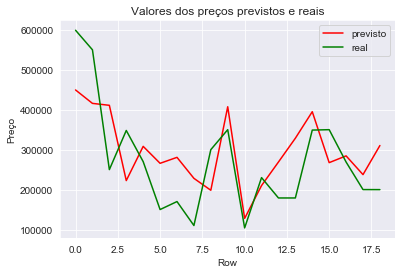

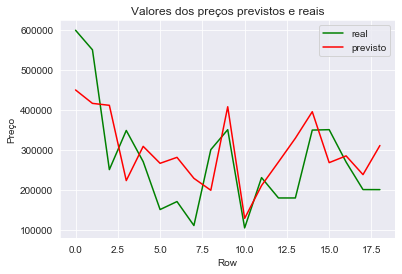

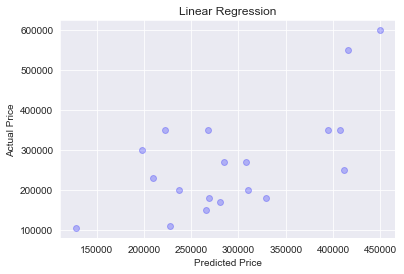

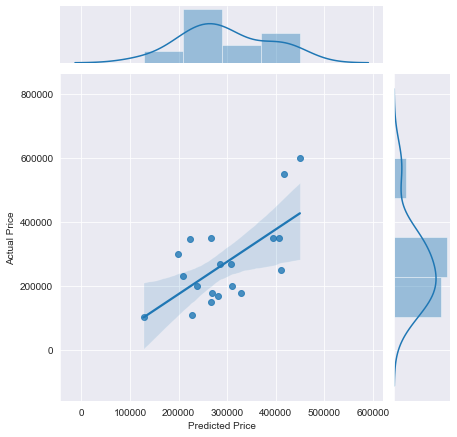

In [103]:
drawPlots(y_test, predictions, 'Linear Regression')

### RandomForestRegression

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Compile the model
rf = RandomForestRegressor(random_state = 42)


#Hyperparamater tuning using RanodomSearchCV
param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 600, stop = 1300, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [12,14,16],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 2]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


# Fit the model
#rf.fit(X_train,y_train)

# Predict
#predictions = rf.predict(X_test)
predictions = grid_search.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 16.4min finished


{'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
0.18398591910952083
MAE: 84097.69078947368
MSE: 11969198757.111933
RMSE: 109403.83337484996


In [105]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 281556.8333333333
Real value 104000


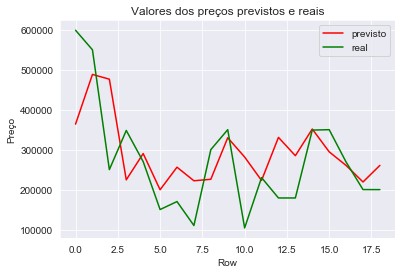

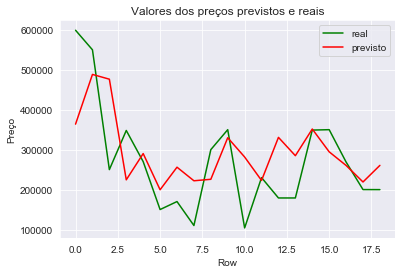

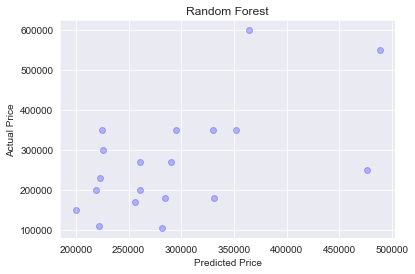

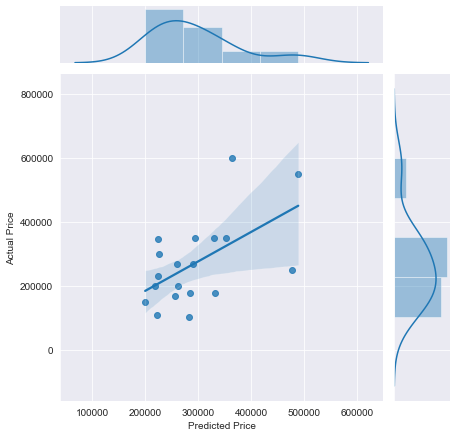

In [106]:
drawPlots(y_test, predictions, 'Random Forest')

### Standard Machine Learning Models (TEMPORÁRIO)

In [107]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [108]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [109]:
results = evaluate(X_train, X_test, y_train, y_test)

In [110]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

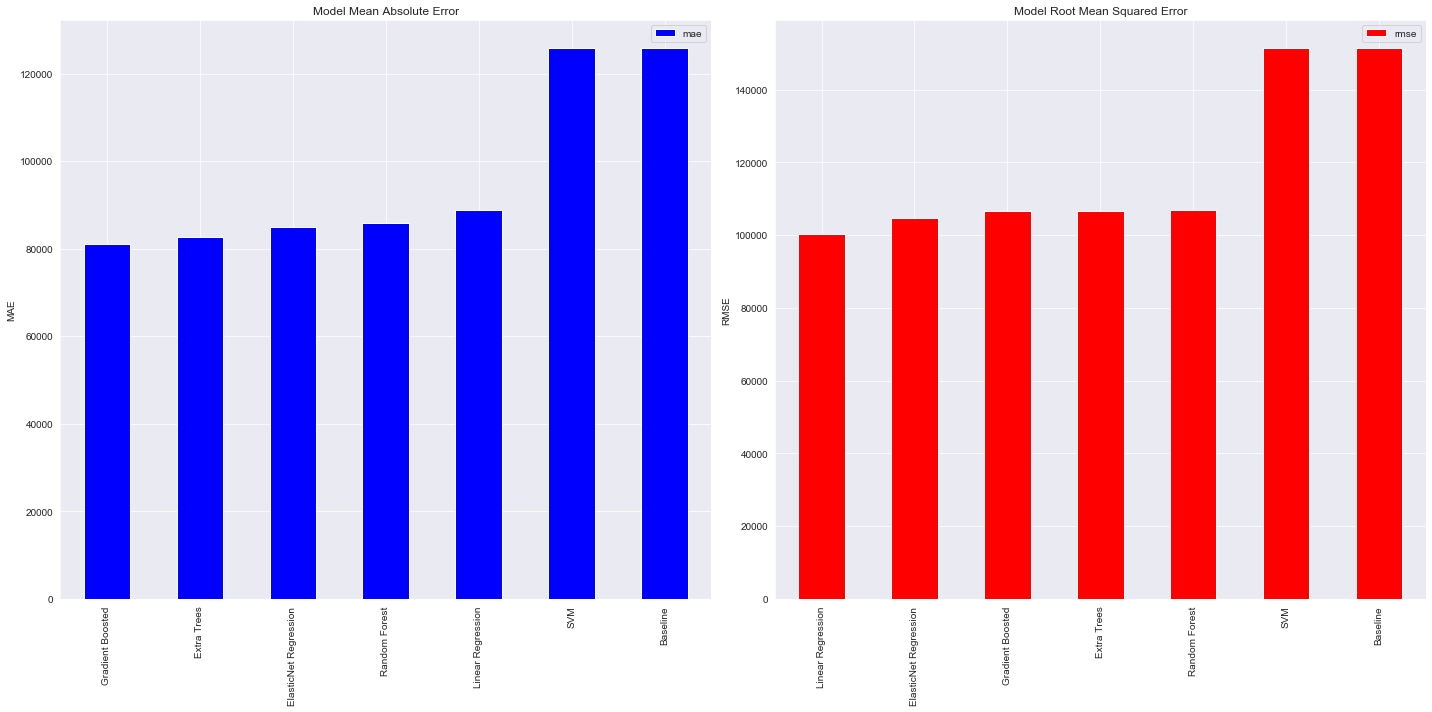

In [111]:
fig = plt.figure(figsize = (20,10))
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

### Ridge Regression

**GridSearchCV**

In [112]:
from sklearn.linear_model import Ridge

# Parameters
params_ridge ={
        'alpha':[0.5,0.75,1,1.25,1.5],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter':[500,750,1000,1250,1500]
        }

# Compile the model
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, param_grid = params_ridge, cv = 5, n_jobs = -1, verbose = 2)

# Fit the model
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

# Predict
predictions = ridge_grid.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


{'alpha': 1, 'max_iter': 1500, 'solver': 'saga'}
0.14911898482312985
MAE: 84809.16453519875
MSE: 11676421012.831814
RMSE: 108057.48938797262


[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    0.9s finished


In [113]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 284946.3619813126
Real value 104000


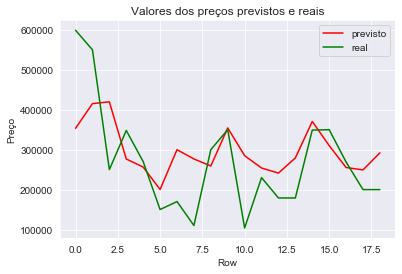

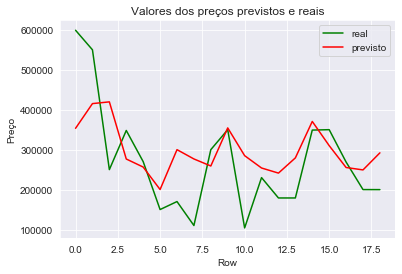

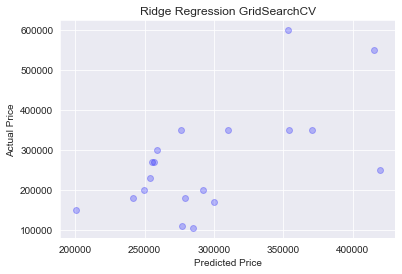

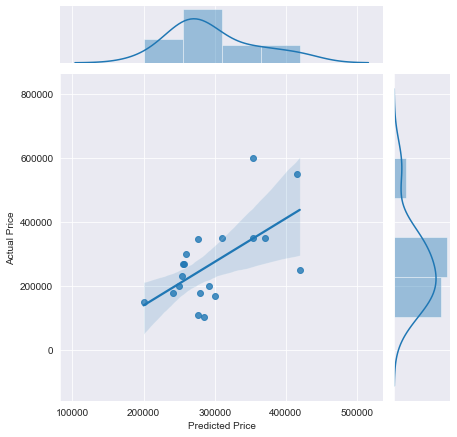

In [114]:
drawPlots(y_test, predictions, 'Ridge Regression GridSearchCV')

### GradientBoostingRegressor

**GridSearchCV**

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

# Parameters
params_gbr={
    'loss':['ls', 'lad', 'huber', 'quantile'],
    'n_estimators':[15,25,50,100],
    'min_samples_split':[1,2,3],
    'max_depth':[4,6,8,10],
    'max_features':['auto', 'sqrt', 'log2']
}

# Compile the model
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(estimator=gbr, param_grid=params_gbr, cv=5, n_jobs=-1, verbose=2)

# Fit the model
gbr_grid.fit(X_train, y_train)
print(gbr_grid.best_params_)
print(gbr_grid.best_score_)

# Predict
predictions = gbr_grid.predict(X_test)

# Metrics
printMetrics(y_test, predictions)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1999 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 2850 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2865 out of 2880 | elapsed:  1.1min remaining:    0.2s


{'loss': 'ls', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 25}
0.21489965614383916
MAE: 83464.10146067454
MSE: 11214092501.620707
RMSE: 105896.61232362773


[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.1min finished


In [116]:
print("Predict value " + str(predictions[10]))
print("Real value " + str(y_test[10]))

Predict value 224090.63837926165
Real value 104000


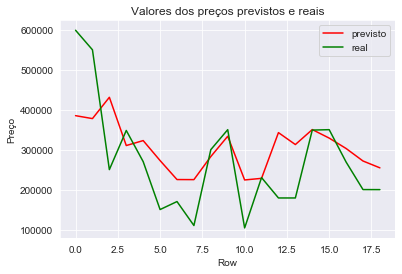

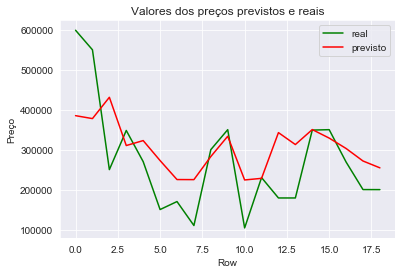

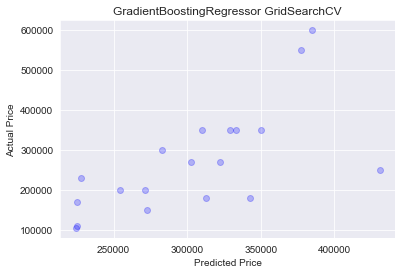

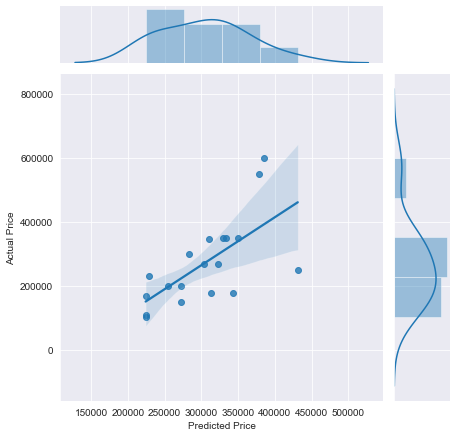

In [117]:
drawPlots(y_test, predictions, 'GradientBoostingRegressor GridSearchCV')

### Decision Tree Regression with AdaBoost

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Metrics
printMetrics(y_2, y)

MAE: 37893.300419063344
MSE: 2153242847.8362675
RMSE: 46403.04782917031


In [119]:
print("Predict value " + str(y_1[10]))
print("Real value " + str(y[10]))

Predict value 213907.31707317074
Real value 365000


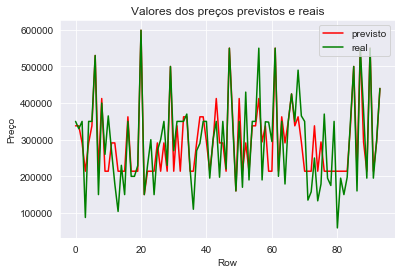

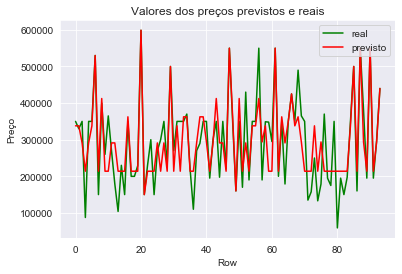

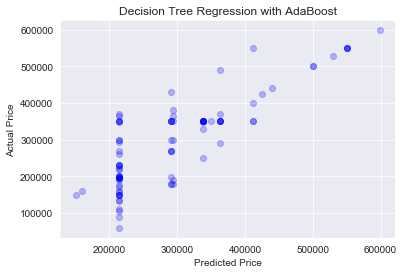

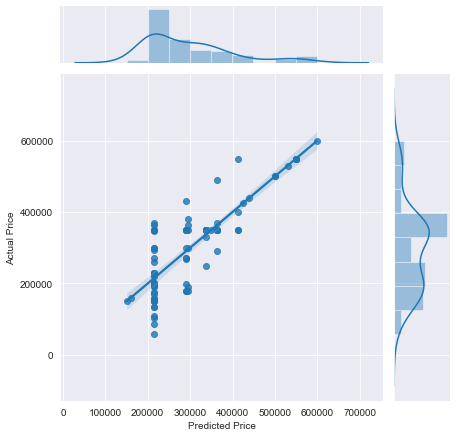

In [120]:
drawPlots(y, y_1, 'Decision Tree Regression with AdaBoost')

### LGBM & ANN - Data Preparation

In [121]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [122]:
data_imo_prédios_mlp

,Id,Preço,Freguesia,Área útil m/2,Condição,Centro Cidade (km),Hospitais (km),Centros Saúde (km),Centro Comerciais (km),Escolas (km),Universidades (km),Estação de Comboios (km),Parques Industriais (km),Central Autocarros (km),Bancos (km),Correios (km),Parques e Zonas Verdes (km),Serviços Públicos (km),Policia Municipal (km),Farmácias (km)
1,14648644,350000,"Braga (Maximinos, Sé e Cividade)",470.00,Usado,1.235,1.145,0.379,2.816,0.612,1.313,0.270,1.779,1.359,0.221,0.235,0.791,0.221,0.858,0.214
2,14683710,330000,"Braga (Maximinos, Sé e Cividade)",470.00,Em construção,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
3,14841256,350000,"Braga (Maximinos, Sé e Cividade)",102.73,Usado,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
4,15375551,87500,"Real, Dume e Semelhe",350.00,Ruína,2.170,2.394,1.918,2.722,0.647,2.236,1.567,0.124,1.858,0.317,1.907,2.254,0.288,1.976,0.858
5,14837028,350000,"Braga (Maximinos, Sé e Cividade)",170.00,Para recuperar,0.741,0.882,0.519,2.277,0.872,1.003,0.399,1.587,0.711,0.342,0.665,0.778,0.808,0.465,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,15434881,550000,São Victor,465.00,Para recuperar,1.586,1.314,0.547,0.299,0.601,0.932,2.603,3.503,1.726,0.806,0.179,0.301,0.629,1.950,0.415
95,15260382,550000,São Victor,870.00,Para recuperar,2.027,0.697,0.762,0.714,0.233,0.876,2.989,2.588,1.918,1.509,0.829,1.279,1.047,2.401,0.791
96,14579713,195000,São Vicente,70.00,Para recuperar,1.752,2.088,1.323,2.022,0.490,1.671,1.587,0.686,1.324,0.749,1.661,1.838,0.692,1.705,0.882
97,11462854,299000,São Victor,315.00,Usado,1.551,1.296,0.533,0.033,0.558,0.915,2.567,3.195,1.604,1.050,0.130,0.610,0.510,1.928,0.195


In [123]:
data_imo_prédios_mlp = pd.get_dummies(data_imo_prédios_mlp)

In [124]:
data_imo_prédios_mlp.shape

(98, 34)

In [125]:
y_mlp = data_imo_prédios_mlp['Preço']
X_mlp = data_imo_prédios_mlp.drop('Preço',axis=1)

from sklearn.model_selection import train_test_split
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size=0.2, random_state=7)
X_train_mlp.shape

(75, 18)

In [126]:
y_train_mlp = pd.DataFrame({'Preço':y_train}) 

In [127]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train_mlp = sc_y.fit_transform(y_train_mlp)
X_train_mlp = sc_X.fit_transform(X_train_mlp)
X_test_mlp = sc_X.transform(X_test_mlp)

In [128]:
y_train_mlp.shape

(75, 1)

In [129]:
flat_y_mlp = y_train_mlp.flatten()
flat_y_mlp.shape

(75,)

### LGBM

In [130]:
import lightgbm as lgb

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_mlp, flat_y_mlp)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')

# train
gbm = lgb.train(params, lgb_train, num_boost_round=250)

# predict
lgbm_prediction_tr = gbm.predict(X_train_mlp, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test_mlp, num_iteration=gbm.best_iteration)

Starting training...


In [131]:
train = lgbm_prediction_tr
test = lgbm_prediction_te

In [132]:
y_pred_mlp = sc_y.inverse_transform(lgbm_prediction_te)

In [133]:
y_pred_mlp

array([392424.12196561, 389887.58063448, 415483.24635313, 211868.739969  ,
       304013.7666261 , 247145.51623598, 244065.28721572, 242306.37520723,
       212126.71017498, 395401.30260366, 245581.98913642, 212396.30027167,
       291558.56609008, 275302.9192538 , 421237.72339682, 309210.22580757,
       281731.29495647, 192900.80656229, 277194.43116715])

In [134]:
# Metrics
printMetrics(y_test, y_pred_mlp)

MAE: 90384.62804510452
MSE: 11208519499.886272
RMSE: 105870.29564465319


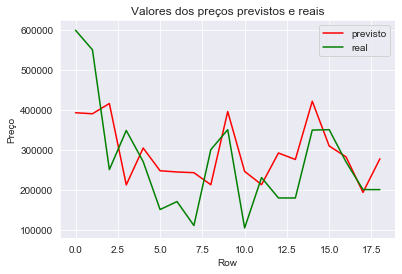

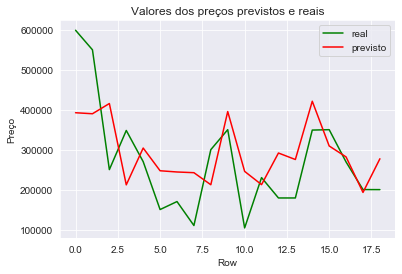

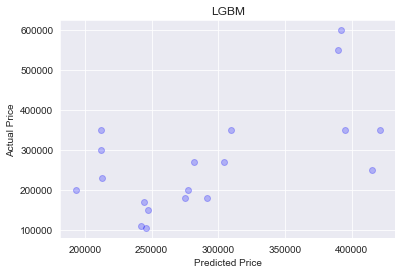

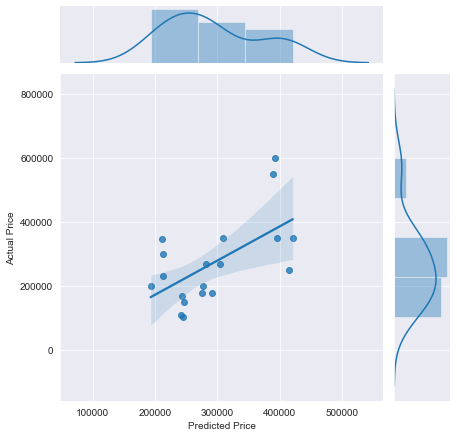

In [135]:
drawPlots(y_test, y_pred_mlp, 'LGBM')

### ANN

In [136]:
def print_history_mae(history):
    print(history.history.keys())
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [139]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                608       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [140]:
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_mae', verbose=1, save_best_only = True, mode='min')

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=3000, callbacks=[checkpoint])

model.load_weights(model_filepath)

Train on 60 samples, validate on 15 samples
Epoch 1/3000
60/60 [==============================] - 1s 11ms/step - loss: 297329.9771 - mae: 297329.9688 - val_loss: 320933.3438 - val_mae: 320933.3438

Epoch 00001: val_mae improved from inf to 320933.34375, saving model to min_vl_model.h5
Epoch 2/3000
60/60 [==============================] - 0s 133us/step - loss: 297329.9167 - mae: 297329.9375 - val_loss: 320933.2812 - val_mae: 320933.2812

Epoch 00002: val_mae improved from 320933.34375 to 320933.28125, saving model to min_vl_model.h5
Epoch 3/3000
60/60 [==============================] - 0s 150us/step - loss: 297329.8521 - mae: 297329.8750 - val_loss: 320933.2188 - val_mae: 320933.2188

Epoch 00003: val_mae improved from 320933.28125 to 320933.21875, saving model to min_vl_model.h5
Epoch 4/3000
60/60 [==============================] - 0s 117us/step - loss: 297329.8063 - mae: 297329.8125 - val_loss: 320933.1875 - val_mae: 320933.1875

Epoch 00004: val_mae improved from 320933.21875 to 3209

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


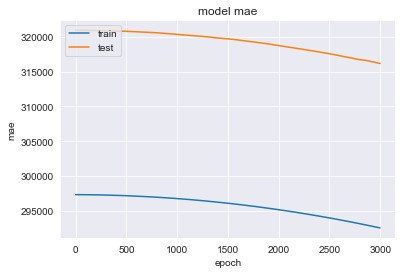

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


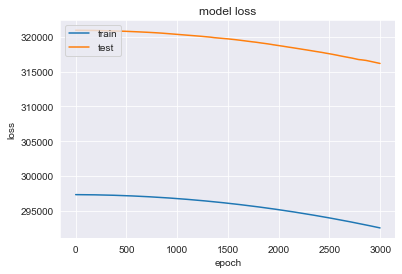

In [141]:
print_history_mae(history)
print_history_loss(history)

In [142]:
y_pred_mlp = model.predict(X_test_scaled)

In [143]:
y_pred_mlp

array([[4782.4785],
       [4776.2954],
       [4774.3926],
       [4782.2266],
       [4770.872 ],
       [4776.703 ],
       [4780.987 ],
       [4761.739 ],
       [4781.2383],
       [4779.1064],
       [4685.826 ],
       [4773.675 ],
       [4779.645 ],
       [4777.3057],
       [4779.1895],
       [4775.3545],
       [4777.255 ],
       [4776.1465],
       [4772.7954]], dtype=float32)

In [144]:
y_preds = []

for item in y_pred_mlp:
    y_preds.append(item[0])

In [145]:
# Metrics
printMetrics(y_test, y_preds)

MAE: 266644.04047594575
MSE: 87863306553.07483
RMSE: 296417.4531856632


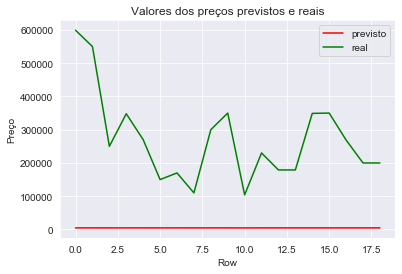

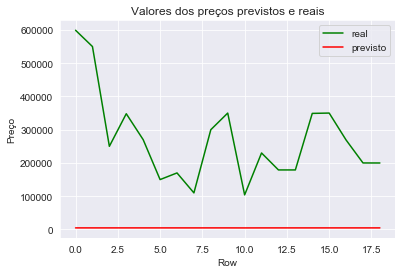

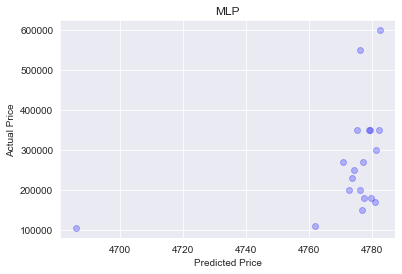

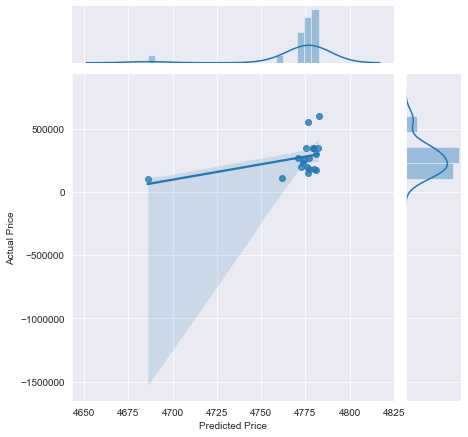

In [146]:
drawPlots(y_test, y_preds, 'MLP')